In [1]:
import random
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

Using TensorFlow backend.
C:\Users\ram\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ram\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ram\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ram\Anaconda3\envs\tensorflow

In [6]:
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)


random.shuffle(data)

idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]


x_train=[]
y_train=[]

x_val=[]
y_val=[]

x_test=[]
y_test=[]

for i in range (len(train)):
    x_train.append(train[i]['x'])

for i in range (len(train)):
    y_train.append(train[i]['y'])

for i in range (len(val)):
    x_val.append(val[i]['x'])

for i in range (len(val)):
    y_val.append(val[i]['y'])
    
for i in range (len(test)):
    x_test.append(test[i]['x'])

for i in range (len(test)):
    y_test.append(test[i]['y'])
    

    # normalize data
x_train = np.array(x_train).astype('float32') / 255.
x_val = np.array(x_val).astype('float32') / 255.
x_test = np.array(x_test).astype('float32') / 255.



# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)


print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

(169, 3)
finished loading 1125 images from 3 categories
train / validation / test split: 787, 169, 169
training data shape:  (787, 224, 224, 3)
training labels shape:  (787, 3)


In [6]:
root = 'data/data'
#exclude = ['Less Damaged']
train_split, val_split = 0.70, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
#categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues,model='VGG16'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(model+'batch'+str(batch_size)+'_epoch'+str(epochs)+'confusion_matrix.png', bbox_inches='tight',dpi=300)
    """"
    if normalized==False:
        plt.savefig('batch64_epoch200CM.png', bbox_inches='tight')
    else:
        plt.savefig('batch32_epoch200CMNormalized.png', bbox_inches='tight')
    """

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.savefig('batch'+str(batch_size)+'_epoch'+str(epochs)+'ROC.png', bbox_inches='tight',dpi=300)
    plt.show()
    
    
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)


random.shuffle(data)

idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]


x_train=[]
y_train=[]

x_val=[]
y_val=[]

x_test=[]
y_test=[]

for i in range (len(train)):
    x_train.append(train[i]['x'])

for i in range (len(train)):
    y_train.append(train[i]['y'])

for i in range (len(val)):
    x_val.append(val[i]['x'])

for i in range (len(val)):
    y_val.append(val[i]['y'])
    
for i in range (len(test)):
    x_test.append(test[i]['x'])

for i in range (len(test)):
    y_test.append(test[i]['y'])
    

    # normalize data
x_train = np.array(x_train).astype('float32') / 255.
x_val = np.array(x_val).astype('float32') / 255.
x_test = np.array(x_test).astype('float32') / 255.



# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)


print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

['data/buildings5-new/Damaged', 'data/buildings5-new/Normal']
(90, 2)
finished loading 600 images from 2 categories
train / validation / test split: 420, 90, 90
training data shape:  (420, 224, 224, 3)
training labels shape:  (420, 2)


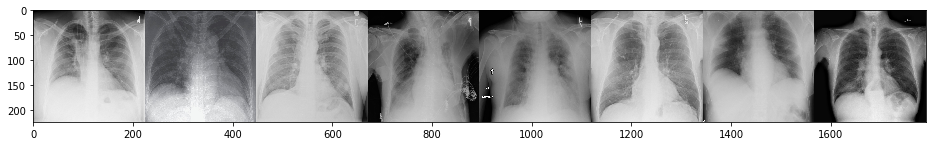

In [7]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)
plt.savefig('sampleroads.png', bbox_inches='tight')

# 1- Model VGG-16 Normal

Train on 420 samples, validate on 90 samples
Epoch 1/300
420/420 [==============================] - 5s 13ms/step - loss: 0.7731 - accuracy: 0.4714 - val_loss: 0.7222 - val_accuracy: 0.4333
Epoch 2/300
420/420 [==============================] - 5s 12ms/step - loss: 0.7152 - accuracy: 0.4619 - val_loss: 0.7211 - val_accuracy: 0.4889
Epoch 3/300
420/420 [==============================] - 5s 12ms/step - loss: 0.6875 - accuracy: 0.5429 - val_loss: 0.6779 - val_accuracy: 0.5667
Epoch 4/300
420/420 [==============================] - 5s 12ms/step - loss: 0.6624 - accuracy: 0.6095 - val_loss: 0.6580 - val_accuracy: 0.6444
Epoch 5/300
420/420 [==============================] - 5s 12ms/step - loss: 0.6368 - accuracy: 0.6929 - val_loss: 0.6268 - val_accuracy: 0.7222
Epoch 6/300
420/420 [==============================] - 5s 12ms/step - loss: 0.6131 - accuracy: 0.7452 - val_loss: 0.6170 - val_accuracy: 0.7111
Epoch 7/300
420/420 [==============================] - 5s 12ms/step - loss: 0.5909 - accura

420/420 [==============================] - 5s 13ms/step - loss: 0.2313 - accuracy: 0.8976 - val_loss: 0.2807 - val_accuracy: 0.8667
Epoch 114/300
420/420 [==============================] - 5s 12ms/step - loss: 0.2302 - accuracy: 0.9048 - val_loss: 0.2843 - val_accuracy: 0.8556
Epoch 115/300
420/420 [==============================] - 5s 13ms/step - loss: 0.2322 - accuracy: 0.9024 - val_loss: 0.2798 - val_accuracy: 0.8667
Epoch 116/300
420/420 [==============================] - 5s 13ms/step - loss: 0.2297 - accuracy: 0.9000 - val_loss: 0.2814 - val_accuracy: 0.8778
Epoch 117/300
420/420 [==============================] - 5s 12ms/step - loss: 0.2310 - accuracy: 0.9000 - val_loss: 0.2793 - val_accuracy: 0.8778
Epoch 118/300
420/420 [==============================] - 5s 13ms/step - loss: 0.2292 - accuracy: 0.8929 - val_loss: 0.2786 - val_accuracy: 0.8778
Epoch 119/300
420/420 [==============================] - 5s 13ms/step - loss: 0.2273 - accuracy: 0.9000 - val_loss: 0.2774 - val_accuracy:

420/420 [==============================] - 5s 13ms/step - loss: 0.1791 - accuracy: 0.9310 - val_loss: 0.2367 - val_accuracy: 0.9111
Epoch 241/300
420/420 [==============================] - 5s 13ms/step - loss: 0.1792 - accuracy: 0.9333 - val_loss: 0.2375 - val_accuracy: 0.9111
Epoch 242/300
420/420 [==============================] - 5s 12ms/step - loss: 0.1790 - accuracy: 0.9310 - val_loss: 0.2371 - val_accuracy: 0.9111
Epoch 243/300
420/420 [==============================] - 5s 13ms/step - loss: 0.1787 - accuracy: 0.9357 - val_loss: 0.2360 - val_accuracy: 0.9111
Epoch 244/300
420/420 [==============================] - 5s 13ms/step - loss: 0.1792 - accuracy: 0.9310 - val_loss: 0.2365 - val_accuracy: 0.9111
Epoch 245/300
420/420 [==============================] - 5s 13ms/step - loss: 0.1793 - accuracy: 0.9310 - val_loss: 0.2364 - val_accuracy: 0.9111
Epoch 246/300
420/420 [==============================] - 5s 12ms/step - loss: 0.1776 - accuracy: 0.9357 - val_loss: 0.2363 - val_accuracy:

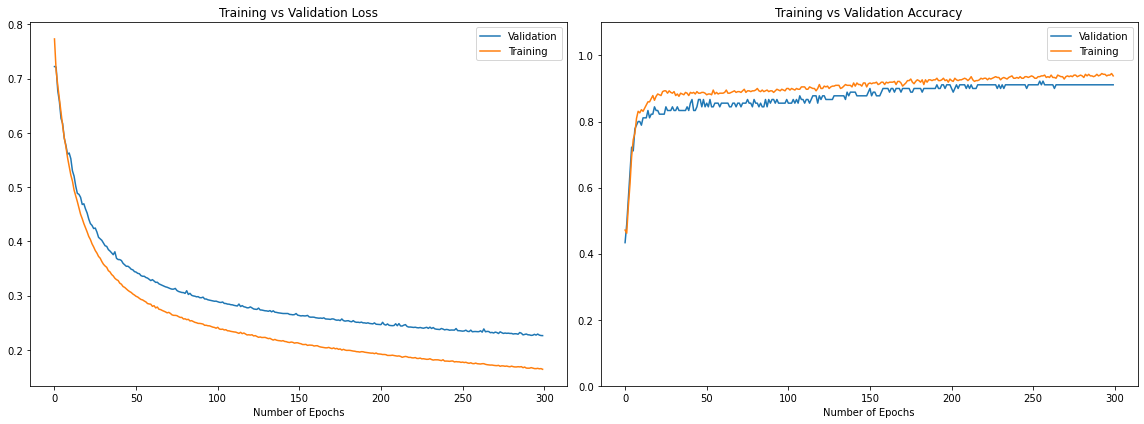

Test loss: 0.2644338130950928
Test accuracy: 0.8888888955116272
Val loss: 0.22613438102934097
Val accuracy: 0.9111111164093018
Train loss: 0.16320669565882
Train accuracy: 0.9404761791229248
Confusion matrix, without normalization
[[0.86 0.14]
 [0.09 0.91]]


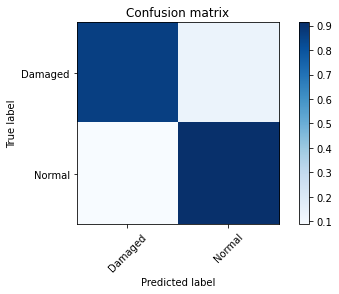

In [8]:
from keras import optimizers
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
#vgg.summary()

inp = vgg.input
new_classification_layer = Dense(num_classes, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_VGG16 = Model(inp, out)

for l, layer in enumerate(model_VGG16.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(model_VGG16.layers[-1:]):
    layer.trainable = True
    

opt=optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_VGG16.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#model_new.summary()

batch_size=4
epochs=300

historyVGG16 = model_VGG16.fit(x_train, y_train, 
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(x_val, y_val))

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.plot(historyVGG16.history["val_loss"],label='Validation')
ax.plot(historyVGG16.history['loss'],label='Training')
ax.set_title("Training vs Validation Loss")
ax.set_xlabel("Number of Epochs")
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(historyVGG16.history["val_accuracy"],label='Validation')
ax2.plot(historyVGG16.history["accuracy"],label='Training')
ax2.set_title("Training vs Validation Accuracy")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylim(0, 1.1)
ax2.legend()
plt.tight_layout()
plt.savefig('VGG16-batch'+str(batch_size)+'_epoch'+str(epochs)+'Train_Val.png', bbox_inches='tight',dpi=300)
plt.show()


loss, accuracy = model_VGG16.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

loss, accuracy = model_VGG16.evaluate(x_val, y_val, verbose=0)

print('Val loss:', loss)
print('Val accuracy:', accuracy)

loss, accuracy = model_VGG16.evaluate(x_train, y_train, verbose=0)

print('Train loss:', loss)
print('Train accuracy:', accuracy)

predictions=model_VGG16.predict(x_test)
predictions2 = np.argmax(predictions,axis=1)
y_test2 = np.argmax(y_test,axis=1)
#plot_roc(predictions2,y_test2)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, ["Damaged","Normal"],model='VGG16')

'''
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.tight_layout()
plot_confusion_matrix(cm_normalized, ["Closed Roads","Open Roads"], title='Normalized confusion matrix',normalized=True)
'''
plt.show()

import pandas as pd
cm=pd.DataFrame(cm)
cm.to_csv("VGG16"+"cm_batchsize_"+str(batch_size)+"epoch_"+str(epochs))

In [9]:
VGG16dict={"Training Accuracy VGG16":historyVGG16.history["accuracy"],'Validation Accuracy VGG16':historyVGG16.history["val_accuracy"],
           'Training Loss VGG16':historyVGG16.history["loss"],'Validation Loss VGG16':historyVGG16.history["val_loss"]}

pd.DataFrame(VGG16dict).to_csv("VGG16dict.csv")

# 2- Model NASNet

In [ ]:
nasnet=keras.applications.nasnet.NASNetMobile(weights='imagenet', include_top=True)
inp = nasnet.input
new_classification_layer = Dense(num_classes, activation='softmax')
out = new_classification_layer(nasnet.layers[-2].output)
model_nasnet = Model(inp, out)

for l, layer in enumerate(model_nasnet.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(model_nasnet.layers[-1:]):
    layer.trainable = True

opt=optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model_nasnet.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_nasnet.summary()


batch_size=4
epochs=300

history_nasnet = model_nasnet.fit(x_train, y_train, 
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(x_val, y_val))
                         
                         
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.plot(history_nasnet.history["val_loss"],label='Validation')
ax.plot(history_nasnet.history['loss'],label='Training')
ax.set_title("Training vs Validation Loss")
ax.set_xlabel("Number of Epochs")
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history_nasnet.history["val_accuracy"],label='Validation')
ax2.plot(history_nasnet.history["accuracy"],label='Training')
ax2.set_title("Training vs Validation Accuracy")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylim(0, 1.1)
ax2.legend()
plt.tight_layout()
plt.savefig('Nasnet'+'batch'+str(batch_size)+'_epoch'+str(epochs)+'Train_Val.png', bbox_inches='tight',dpi=300)
plt.show()
                         
loss, accuracy = model_nasnet.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

loss, accuracy = model_nasnet.evaluate(x_val, y_val, verbose=0)

print('Val loss:', loss)
print('Val accuracy:', accuracy)

loss, accuracy = model_nasnet.evaluate(x_train, y_train, verbose=0)

print('Train loss:', loss)
print('Train accuracy:', accuracy)
                         
predictions=model_nasnet.predict(x_test)
predictions2 = np.argmax(predictions,axis=1)
y_test2 = np.argmax(y_test,axis=1)
#plot_roc(predictions2,y_test2)
                         
                         
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, ["Damaged","Normal"],model='Nasnet')

'''
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.tight_layout()
plot_confusion_matrix(cm_normalized, ["Closed Roads","Open Roads"], title='Normalized confusion matrix',normalized=True)
'''
plt.show()
                         
                         
import pandas as pd
cm=pd.DataFrame(cm)
cm.to_csv("Nasnet cm_batchsize_"+str(batch_size)+"epoch_"+str(epochs))

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

Total params: 4,271,830
Trainable params: 2,114
Non-trainable params: 4,269,716
__________________________________________________________________________________________________
Train on 420 samples, validate on 90 samples
Epoch 1/300
420/420 [==============================] - 10s 24ms/step - loss: 0.9035 - accuracy: 0.5048 - val_loss: 0.9787 - val_accuracy: 0.4000
Epoch 2/300
420/420 [==============================] - 4s 8ms/step - loss: 0.8341 - accuracy: 0.4952 - val_loss: 0.9000 - val_accuracy: 0.4000
Epoch 3/300
420/420 [==============================] - 4s 8ms/step - loss: 0.7942 - accuracy: 0.4762 - val_loss: 0.8538 - val_accuracy: 0.4222
Epoch 4/300
420/420 [==============================] - 4s 8ms/step - loss: 0.7780 - accuracy: 0.4738 - val_loss: 0.8210 - val_accuracy: 0.4556
Epoch 5/300
420/420 [==============================] - 4s 8ms/step - loss: 0.7635 - accuracy: 0.4714 - val_loss: 0.7971 - val_accuracy: 0.4556
Epoch 6/300
420/420 [==============================] - 4s 8

In [ ]:
nasnetdict={'Training Accuracy NASNet':history_nasnet.history["accuracy"],'Validation Accuracy NASNet':history_nasnet.history["val_accuracy"],
           'Training Loss NASNet':history_nasnet.history["loss"],'Validation Loss NASNet':history_nasnet.history["val_loss"]}

pd.DataFrame(nasnetdict).to_csv("nasnetdict.csv")

# 3- VGG19 Model

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

420/420 [==============================] - 6s 15ms/step - loss: 0.2185 - accuracy: 0.9024 - val_loss: 0.2105 - val_accuracy: 0.9444
Epoch 32/300
420/420 [==============================] - 6s 15ms/step - loss: 0.2151 - accuracy: 0.9190 - val_loss: 0.2089 - val_accuracy: 0.9444
Epoch 33/300
420/420 [==============================] - 6s 15ms/step - loss: 0.2140 - accuracy: 0.9071 - val_loss: 0.2067 - val_accuracy: 0.9444
Epoch 34/300
420/420 [==============================] - 6s 15ms/step - loss: 0.2104 - accuracy: 0.9190 - val_loss: 0.2056 - val_accuracy: 0.9333
Epoch 35/300
420/420 [==============================] - 6s 15ms/step - loss: 0.2110 - accuracy: 0.9095 - val_loss: 0.2037 - val_accuracy: 0.9444
Epoch 36/300
420/420 [==============================] - 6s 15ms/step - loss: 0.2154 - accuracy: 0.9048 - val_loss: 0.2018 - val_accuracy: 0.9444
Epoch 37/300
420/420 [==============================] - 6s 15ms/step - loss: 0.2049 - accuracy: 0.9143 - val_loss: 0.2010 - val_accuracy: 0.955

420/420 [==============================] - 6s 15ms/step - loss: 0.1241 - accuracy: 0.9571 - val_loss: 0.1478 - val_accuracy: 0.9556
Epoch 144/300
420/420 [==============================] - 6s 15ms/step - loss: 0.1214 - accuracy: 0.9619 - val_loss: 0.1473 - val_accuracy: 0.9556
Epoch 145/300
420/420 [==============================] - 6s 15ms/step - loss: 0.1217 - accuracy: 0.9571 - val_loss: 0.1526 - val_accuracy: 0.9667
Epoch 146/300
420/420 [==============================] - 6s 15ms/step - loss: 0.1227 - accuracy: 0.9619 - val_loss: 0.1481 - val_accuracy: 0.9556
Epoch 147/300
420/420 [==============================] - 6s 15ms/step - loss: 0.1258 - accuracy: 0.9571 - val_loss: 0.1504 - val_accuracy: 0.9556
Epoch 148/300
420/420 [==============================] - 6s 15ms/step - loss: 0.1233 - accuracy: 0.9548 - val_loss: 0.1485 - val_accuracy: 0.9556
Epoch 149/300
420/420 [==============================] - 6s 15ms/step - loss: 0.1196 - accuracy: 0.9500 - val_loss: 0.1535 - val_accuracy:

420/420 [==============================] - 6s 15ms/step - loss: 0.0919 - accuracy: 0.9714 - val_loss: 0.1429 - val_accuracy: 0.9556
Epoch 256/300
420/420 [==============================] - 6s 15ms/step - loss: 0.0892 - accuracy: 0.9786 - val_loss: 0.1434 - val_accuracy: 0.9556
Epoch 257/300
420/420 [==============================] - 6s 15ms/step - loss: 0.0881 - accuracy: 0.9762 - val_loss: 0.1437 - val_accuracy: 0.9556
Epoch 258/300
420/420 [==============================] - 6s 15ms/step - loss: 0.0894 - accuracy: 0.9786 - val_loss: 0.1428 - val_accuracy: 0.9556
Epoch 259/300
420/420 [==============================] - 6s 15ms/step - loss: 0.0886 - accuracy: 0.9738 - val_loss: 0.1431 - val_accuracy: 0.9556
Epoch 260/300
420/420 [==============================] - 6s 15ms/step - loss: 0.0914 - accuracy: 0.9786 - val_loss: 0.1438 - val_accuracy: 0.9556
Epoch 261/300
420/420 [==============================] - 6s 15ms/step - loss: 0.0898 - accuracy: 0.9667 - val_loss: 0.1432 - val_accuracy:

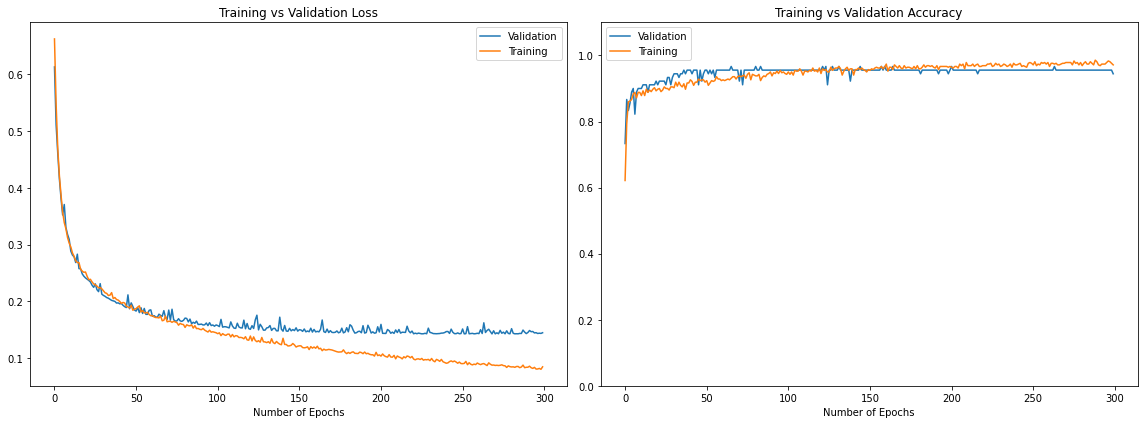

Test loss: 0.2340038345919715
Test accuracy: 0.8999999761581421
Val loss: 0.14475683801703984
Val accuracy: 0.9444444179534912
Train loss: 0.07987876477695646
Train accuracy: 0.973809540271759
Confusion matrix, without normalization
[[0.91 0.09]
 [0.11 0.89]]


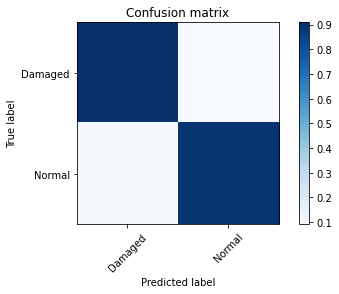

In [13]:
VGG19=keras.applications.VGG19(weights='imagenet', include_top=True)
inp = VGG19.input
new_classification_layer = Dense(num_classes, activation='softmax')
out = new_classification_layer(VGG19.layers[-2].output)
model_VGG19 = Model(inp, out)

for l, layer in enumerate(model_VGG19.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(model_VGG19.layers[-1:]):
    layer.trainable = True

opt=optimizers.Adam(learning_rate=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_VGG19.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_VGG19.summary()


batch_size=4
epochs=300

history_VGG19 = model_VGG19.fit(x_train, y_train, 
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(x_val, y_val))
                         
fig=plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.plot(history_VGG19.history["val_loss"],label='Validation')
ax.plot(history_VGG19.history['loss'],label='Training')
ax.set_title("Training vs Validation Loss")
ax.set_xlabel("Number of Epochs")
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history_VGG19.history["val_accuracy"],label='Validation')
ax2.plot(history_VGG19.history["accuracy"],label='Training')
ax2.set_title("Training vs Validation Accuracy")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylim(0, 1.1)
ax2.legend()
plt.tight_layout()
plt.savefig('VGG19'+'batch'+str(batch_size)+'_epoch'+str(epochs)+'Train_Val.png', bbox_inches='tight',dpi=300)
plt.show()
                         
loss, accuracy = model_VGG19.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

loss, accuracy = model_VGG19.evaluate(x_val, y_val, verbose=0)

print('Val loss:', loss)
print('Val accuracy:', accuracy)

loss, accuracy = model_VGG19.evaluate(x_train, y_train, verbose=0)

print('Train loss:', loss)
print('Train accuracy:', accuracy)
                         
predictions=model_VGG19.predict(x_test)
predictions2 = np.argmax(predictions,axis=1)
y_test2 = np.argmax(y_test,axis=1)
#plot_roc(predictions2,y_test2)
                         
                         
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, ["Damaged","Normal"],model='VGG19')

'''
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.tight_layout()
plot_confusion_matrix(cm_normalized, ["Closed Roads","Open Roads"], title='Normalized confusion matrix',normalized=True)
'''
plt.show()
                         
                         
import pandas as pd
cm=pd.DataFrame(cm)
cm.to_csv("VGG19 cm_batchsize_"+str(batch_size)+"epoch_"+str(epochs))                         


In [14]:
VGG19dict={"Training Accuracy VGG16":history_VGG19.history["accuracy"],'Validation Accuracy VGG16':history_VGG19.history["val_accuracy"],
           'Training Loss VGG16':history_VGG19.history["loss"],'Validation Loss VGG16':history_VGG19.history["val_loss"]}

pd.DataFrame(VGG19dict).to_csv("VGG19dict.csv")

In [ ]:
fig=plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.plot(historyVGG16.history["loss"],label='Training Loss VGG16')
ax.plot(history_VGG19.history["loss"],label='Training Loss VGG19')
ax.plot(history_nasnet.history["loss"],label='Training Loss NASNet')
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(historyVGG16.history["val_loss"],label='Validation Loss VGG16')
ax.plot(history_VGG19.history["val_loss"],label='Training Loss VGG19')
ax2.plot(history_nasnet.history["val_loss"],label='Validation Loss NASNet')
ax2.legend()

plt.tight_layout()
plt.savefig("Val-Train-Loss-Comparison", bbox_inches='tight',dpi=300)
plt.show()


In [ ]:
fig=plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.plot(historyVGG16.history["accuracy"],label='Training Accuracy VGG16')
ax.plot(history_VGG19.history["accuracy"],label='Training Accuracy VGG19')
ax.plot(history_nasnet.history["accuracy"],label='Training Accuracy NASNet')
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(historyVGG16.history["val_accuracy"],label='Validation Accuracy VGG16')
ax.plot(history_VGG19.history["val_accuracy"],label='Training Accuracy VGG19')
ax2.plot(history_nasnet.history["val_accuracy"],label='Validation Accuracy NASNet')
ax2.legend()

plt.tight_layout()
plt.savefig("Val-Train-Loss-Comparison", bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
accuracydict={"Training Accuracy VGG16":historyVGG16.history["accuracy"],'Training Accuracy VGG19':history_VGG19.history["accuracy"],
     'Validation Accuracy VGG16':historyVGG16.history["val_accuracy"],'Validation Accuracy VGG19':history_VGG19.history["val_accuracy"]}
lossdict={'Training Loss VGG16':historyVGG16.history["loss"],'Training Loss VGG19':history_VGG19.history["loss"],
         'Validation Loss VGG16':historyVGG16.history["val_loss"],'Validation Loss VGG19':history_VGG19.history["val_loss"]}

In [ ]:
pd.DataFrame(accuracydict).to_csv("accuracydict")

In [ ]:
pd.DataFrame(lossdict).to_csv("lossdict")

In [ ]:
nasnetdict={'Training Accuracy NASNet':history_nasnet.history["accuracy"],'Validation Accuracy NASNet':history_nasnet.history["val_accuracy"],
           'Training Loss NASNet':history_nasnet.history["loss"],'Validation Loss NASNet':history_nasnet.history["val_loss"]}

In [ ]:
pd.DataFrame(nasnetdict).to_csv("nasnetdict")

In [ ]:
import pandas as pd
VGG16dict=pd.read_csv("accuracydict")
VGG19dict=pd.read_csv("lossdict")
nasnetdict=pd.read_csv("nasnetdict")


In [ ]:
TrainAccVGG16=accuracydict["Training Accuracy VGG16"]
TrainAccVGG19=accuracydict["Training Accuracy VGG19"]
ValAccVGG16=accuracydict["Validation Accuracy VGG16"]
ValAccVGG19=accuracydict["Validation Accuracy VGG19"]

TrainlossVGG16=lossdict["Training Loss VGG16"]
TrainlossVGG19=lossdict["Training Loss VGG19"]
VallossVGG16=lossdict["Validation Loss VGG16"]
VallossVGG19=lossdict["Validation Loss VGG19"]

In [ ]:
TrainAccNasnet=nasnetdict["Training Accuracy NASNet"]
VallAccNasnet=nasnetdict["Validation Accuracy NASNet"]

TrainlossNasnet=nasnetdict["Training Loss NASNet"]
ValllossNasnet=nasnetdict["Validation Loss NASNet"]


In [ ]:
fig=plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.plot(TrainlossVGG16, 'g--',label='Training Loss VGG16')
ax.plot(TrainlossVGG19,'b-.',label='Training Loss VGG19')
ax.plot(TrainlossNasnet,'r',label='Training Loss NASNet')
ax.set_xlabel("Number of Epochs",fontsize=12)
ax.set_ylabel("Training Loss",fontsize=12)
ax.legend(fontsize=12)

ax2 = fig.add_subplot(122)
ax2.plot(VallossVGG16,'g--',label='Validation Loss VGG16')
ax2.plot(VallossVGG19,'b-.',label='Validation Loss VGG19')
ax2.plot(ValllossNasnet,'r',label='Validation Loss NASNet')
ax2.set_xlabel("Number of Epochs",fontsize=12)
ax2.set_ylabel("Validation Loss",fontsize=12)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.savefig("Val-Train-Loss-Comparison", bbox_inches='tight',dpi=300)
plt.show()


In [ ]:
fig=plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.plot(TrainAccVGG16,'g--',label='Training Accuracy VGG16')
ax.plot(TrainAccVGG19,'b-.',label='Training Accuracy VGG19')
ax.plot(TrainAccNasnet,'r',label='Training Accuracy NASNet')
ax.set_xlabel("Number of Epochs",fontsize=12)
ax.set_ylabel("Training Accuracy",fontsize=12)
ax.legend(fontsize=12)

ax2 = fig.add_subplot(122)
ax2.plot(ValAccVGG16,'g--',label='Validation Accuracy VGG16')
ax2.plot(ValAccVGG19,'b-.',label='Validation Accuracy VGG19')
ax2.plot(VallAccNasnet,'r',label='Validation Accuracy NASNet')
ax2.set_xlabel("Number of Epochs",fontsize=12)
ax2.set_ylabel("Validation Accuracy",fontsize=12)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.savefig("Val-Train-Acc-Comparison", bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
os.remove("nasnetdict")

In [ ]:
batch_size=4
epochs=100

history_VGG19 = model_VGG19.fit(x_train, y_train, 
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(x_val, y_val))
